# Analyzing Observations as a Percentage of Volume
***
We wish to investigate obervations as a percentage of volume, grouped by each hour over 24 hours. This is done by finding the mean `obs` value per hour across 5 days (weekdays), doing the same for `volume`, and then creating a fraction with these averages to represent a sort of percentage indicator.

<br>
We will do this for the following segments:
* Front from Bathurst to Spadina
* Front from Spadina to Bathurst
* Adelaide from Bathurst to Spadina
* Richmond from Spadina to Bathurst

In [25]:
import configparser
from psycopg2 import connect
import psycopg2.sql as pg
import pandas.io.sql as pandasql
import pandas as pd
import matplotlib.pyplot as plt
import datetime
pd.options.display.mpl_style = 'default'

# connect to database
CONFIG = configparser.ConfigParser()
CONFIG.read(r'C:\Users\alouis2\Documents\Python Scripts\db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## Summary of Results:
***

Below is a table summarizing the mean percentage values; mean percentage meaning the sum of all bluetooth observations for 24 hours divided by the sum of all volumes.

In [58]:
x = [['Front (Eastbound)', sum(fronteb['obs'])/sum(fronteb['volume'])],
     ['Front (Westbound)', sum(frontwb['obs'])/sum(frontwb['volume'])],
     ['Adelaide (Eastbound)', sum(adelaideeb['obs'])/sum(adelaideeb['volume'])],
     ['Richmond (Westbound)', sum(richmondwb['obs'])/sum(richmondwb['volume'])]]

for i in x:
    i[1] = (round(i[1],3))

summary = pd.DataFrame(x, columns=['Route', 'Mean Percentage'])
  

summary

,Route,Mean Percentage
0,Front (Eastbound),0.060
1,Front (Westbound),0.047
2,Adelaide (Eastbound),0.038
3,Richmond (Westbound),0.039


### Front Eastbound (Bathurst to Spadina)
***

The data grabbed in this query runs from November 1th, 2017 to November 8th, 2017, minus the 4th and 5th because they are part of the weekend. We make a function called `rounder` that rounds all decimal values in our dataframes to appropriate decimal places. 

In [53]:
query = open('front_percentage.sql', 'r',  encoding='utf-8-sig')
fronteb = pd.read_sql_query(query.read(),con)

def rounder(df):
    for i in range(len(df)):
        df.obs.values[i] = round(df.obs.values[i],1)
        df.volume.values[i] = round(df.volume.values[i],1)
        df.percentage.values[i]= round(df.percentage.values[i],2)

We create a new column in the dataframe called `percentage`, which will contain obs/volume values. Below are the average bluetooth observations, volumes, and percentages for each hour across 24 hours. 

In [54]:
fronteb['percentage'] = fronteb['obs']/fronteb['volume']

rounder(fronteb)

fronteb

,datetime_bin,obs,volume,percentage
0,00:00:00,4.8,127.0,0.04
1,01:00:00,5.0,92.5,0.05
2,02:00:00,4.5,80.2,0.06
3,03:00:00,3.2,54.8,0.06
4,04:00:00,3.2,37.2,0.09
5,05:00:00,4.8,82.2,0.06
6,06:00:00,16.8,270.8,0.06
7,07:00:00,39.8,476.0,0.08
8,08:00:00,41.4,608.6,0.07
9,09:00:00,44.8,568.4,0.08


We plot this percentage value over these time bins. 

C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


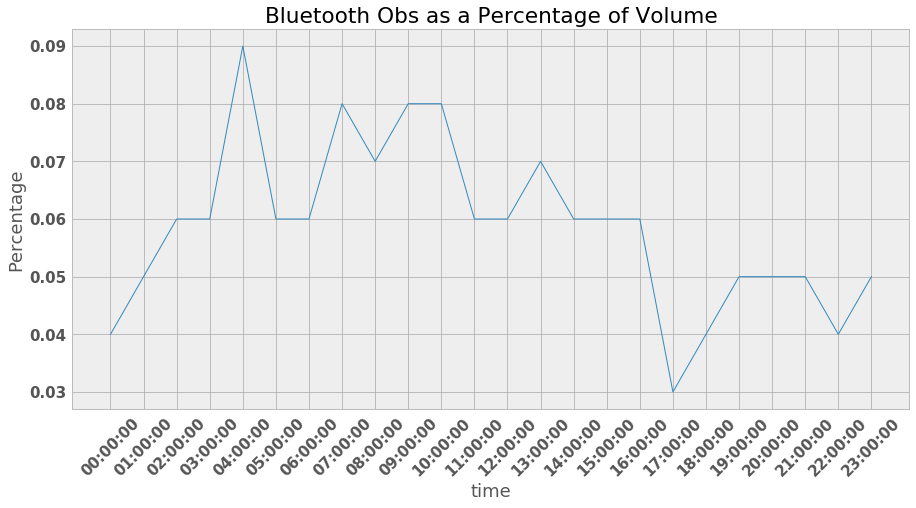

In [61]:
plt.figure(figsize = (15,7))
plt.plot(fronteb['datetime_bin'], fronteb['percentage'])
plt.title('Bluetooth Obs as a Percentage of Volume')

plt.rc('font', **font)
base = datetime.time(0,0)
l = [base]
for i in range(0, 23):
    base = (datetime.datetime.combine(datetime.date(1, 1, 1), base) + datetime.timedelta(minutes=60)).time()
    l.append(base)
plt.axes().get_xaxis().set_ticks(l)
plt.xticks(rotation = 45)
plt.ylabel('Percentage')
plt.show()

#### Summary 
****
From the above graph, we note:
<br>

* Percentage trends upwards from Midnight to 6 A.M.
* Percentage trends downards overall from 6 A.M. to 5 P.M (albeit with peaks and valleys inbetween)
* Percentage trends upwards overall after 5 P.M. 


### Front Westbound (Spadina to Bathurst)
***

The data grabbed in this query runs from November 1th, 2017 to November 8th, 2017, minus the 4th and 5th because they are part of the weekend.


In [30]:
query = open('front_wbpercentage.sql', 'r',  encoding='utf-8-sig')
frontwb = pd.read_sql_query(query.read(),con)

In [55]:
frontwb['percentage'] = frontwb['obs']/frontwb['volume']
rounder(frontwb)

frontwb

,datetime_bin,obs,volume,percentage
0,00:00:00,5.0,95.2,0.05
1,01:00:00,5.8,63.0,0.09
2,02:00:00,4.2,48.5,0.09
3,03:00:00,2.0,34.3,0.06
4,04:00:00,2.0,24.7,0.08
5,05:00:00,1.8,39.8,0.04
6,06:00:00,6.5,90.0,0.07
7,07:00:00,10.0,161.0,0.06
8,08:00:00,11.8,217.6,0.05
9,09:00:00,8.8,221.6,0.04


C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


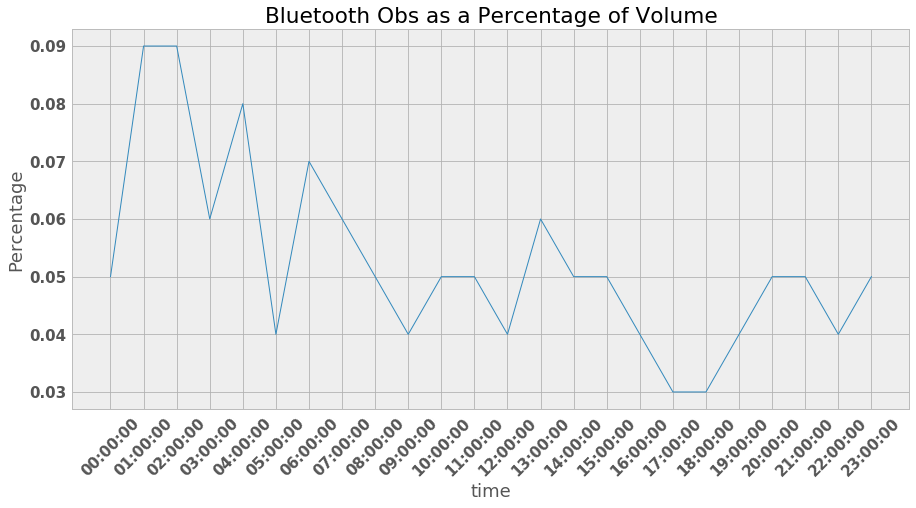

In [60]:
plt.figure(figsize = (15,7))
plt.plot(frontwb['datetime_bin'], frontwb['percentage'])
plt.title('Bluetooth Obs as a Percentage of Volume')
plt.rc('font', **font)
base = datetime.time(0,0)
l = [base]
for i in range(0, 23):
    base = (datetime.datetime.combine(datetime.date(1, 1, 1), base) + datetime.timedelta(minutes=60)).time()
    l.append(base)
plt.axes().get_xaxis().set_ticks(l)
plt.xticks(rotation = 45)
plt.ylabel('Percentage')
plt.show()

#### Summary 
****
From the above, we note:
* Downward trend from midnight till 5 P.M (with peaks and valleys in between)
* Upwards trend from 5 P.M. onwards

### Adelaide Eastbound (Bathurst to Spadina)
***

The data grabbed in this query runs from December 4th, 2017 to December 8th, 2017.

In [33]:
query = open('adelaide_percentage.sql', 'r',  encoding='utf-8-sig')
adelaideeb = pd.read_sql_query(query.read(),con)
adelaideeb['percentage'] = adelaideeb['obs']/adelaideeb['volume']

In [56]:
rounder(adelaideeb)
adelaideeb

,datetime_bin,obs,volume,percentage
0,00:00:00,9.0,359.5,0.03
1,01:00:00,6.0,334.0,0.02
2,02:00:00,7.5,277.5,0.03
3,03:00:00,3.5,166.8,0.02
4,04:00:00,6.0,58.0,0.10
5,05:00:00,8.0,125.0,0.06
6,06:00:00,31.4,441.6,0.07
7,07:00:00,38.4,768.4,0.05
8,08:00:00,49.0,978.6,0.05
9,09:00:00,37.0,916.8,0.04


C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


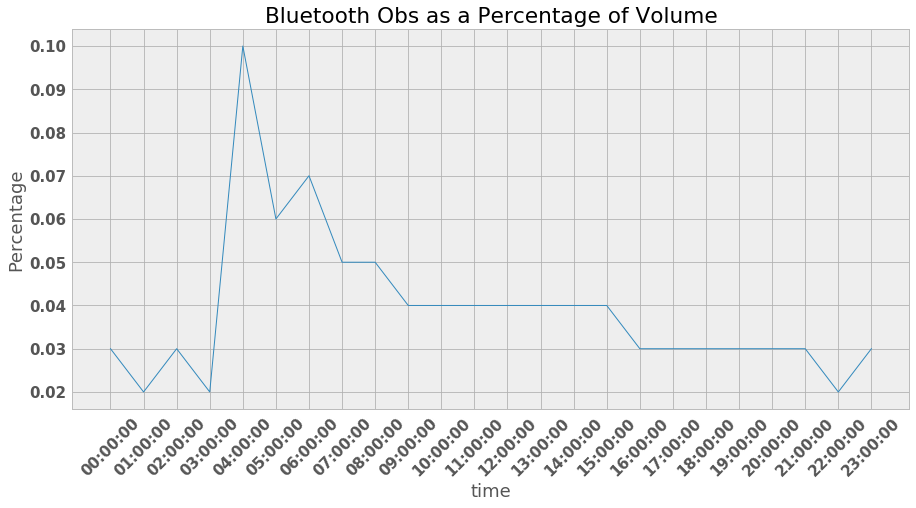

In [59]:
plt.figure(figsize = (15,7))
plt.plot(adelaideeb['datetime_bin'], adelaideeb['percentage'])
plt.title('Bluetooth Obs as a Percentage of Volume')
plt.rc('font', **font)
base = datetime.time(0,0)
l = [base]
for i in range(0, 23):
    base = (datetime.datetime.combine(datetime.date(1, 1, 1), base) + datetime.timedelta(minutes=60)).time()
    l.append(base)
plt.axes().get_xaxis().set_ticks(l)
plt.xticks(rotation = 45)
plt.ylabel('Percentage')
plt.show()

#### Summary 
****
From the above we note: 
* Spike at 4 A.M.
* Downward Trend after 4 A.M. Trend is much smoother and seemingly more exponnential than the previous two segments. 

### Richmond Westbound (Spadina to Bathurst)
***

The data grabbed in this query runs from December 4th, 2017 to December 8th, 2017.

In [36]:
query = open('richmond_wbpercentage.sql', 'r',  encoding='utf-8-sig')
richmondwb = pd.read_sql_query(query.read(),con)
richmondwb['percentage'] = richmondwb['obs']/richmondwb['volume']

In [57]:
rounder(richmondwb)
richmondwb

,datetime_bin,obs,volume,percentage
0,00:00:00,6.5,240.0,0.03
1,01:00:00,9.5,179.5,0.05
2,02:00:00,4.5,141.0,0.03
3,03:00:00,2.5,72.5,0.03
4,05:00:00,4.0,59.0,0.07
5,06:00:00,5.4,112.4,0.05
6,07:00:00,12.4,257.4,0.05
7,08:00:00,11.8,342.6,0.03
8,09:00:00,13.0,345.2,0.04
9,10:00:00,10.8,349.2,0.03


C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


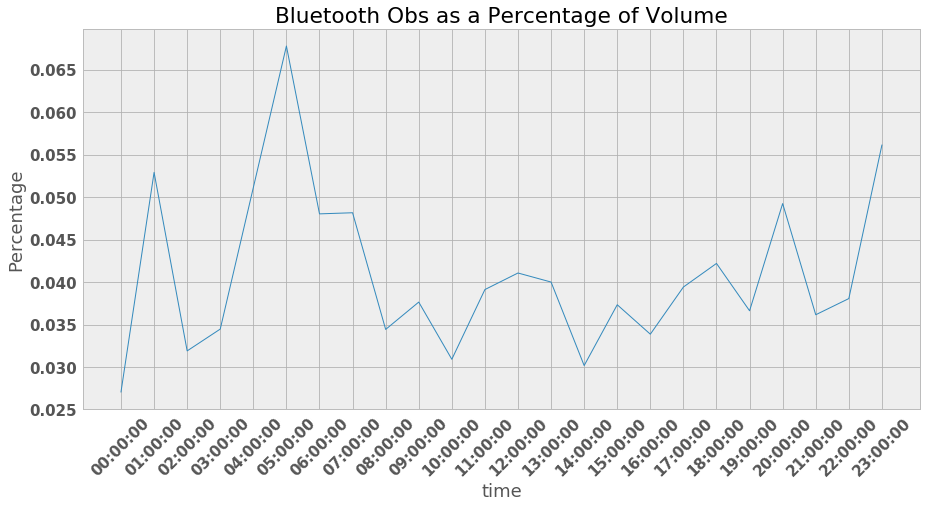

In [38]:
plt.figure(figsize = (15,7))
plt.plot(richmondwb['datetime_bin'], richmondwb['percentage'])
plt.title('Bluetooth Obs as a Percentage of Volume')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
base = datetime.time(0,0)
l = [base]
for i in range(0, 23):
    base = (datetime.datetime.combine(datetime.date(1, 1, 1), base) + datetime.timedelta(minutes=60)).time()
    l.append(base)
plt.axes().get_xaxis().set_ticks(l)
plt.xticks(rotation = 45)
plt.ylabel('Percentage')
plt.show()

#### Summary 
****
From the above we note:
* Upwards trend from Midnight to 5 A.M.
* Downward trend from 5 A.M. to 2 P.M.
* Upward trend from 2 P.M. onwards

### Exploring the relationship between Volume and Percentage
***

We suspect a statistical relationship between Volume and Percentage. We graph Volume versus Percentage below.

C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


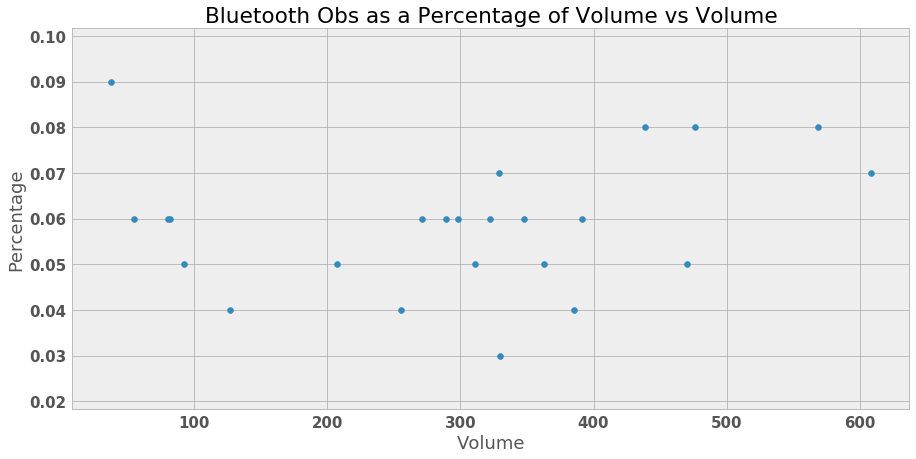

In [66]:
plt.figure(figsize = (15,7))
plt.scatter(fronteb['volume'], fronteb['percentage'])
plt.title('Bluetooth Obs as a Percentage of Volume vs Volume')
plt.rc('font', **font)
plt.ylabel('Percentage')
plt.xlabel('Volume')
plt.show()